In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import src.plots.composite_plot as composite_plot
import proplot as pplt
import matplotlib.patches as patches
from matplotlib.widgets import PolygonSelector

In [2]:
ex = xr.open_dataset(
    "/work/mh0033/m300883/Tel_MMLE/data/MPI_GE_onepct/composite/plev_50000_decade_mpi_first_JJA_JJA_first_last_ts_composite_mean_same_number.nc"
)

/home/m/m300883/miniconda3/envs/TelSeason/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


/home/m/m300883/miniconda3/envs/TelSeason/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/m/m300883/miniconda3/envs/TelSeason/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/m/m300883/miniconda3/envs/TelSeason/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/m/m300883/miniconda3/envs/TelSeason/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `pr

Click on the figure to create a polygon.
Press the 'esc' key to start a new polygon.
Try holding the 'shift' key to move all of the vertices.
Try holding the 'ctrl' key to move a single vertex.


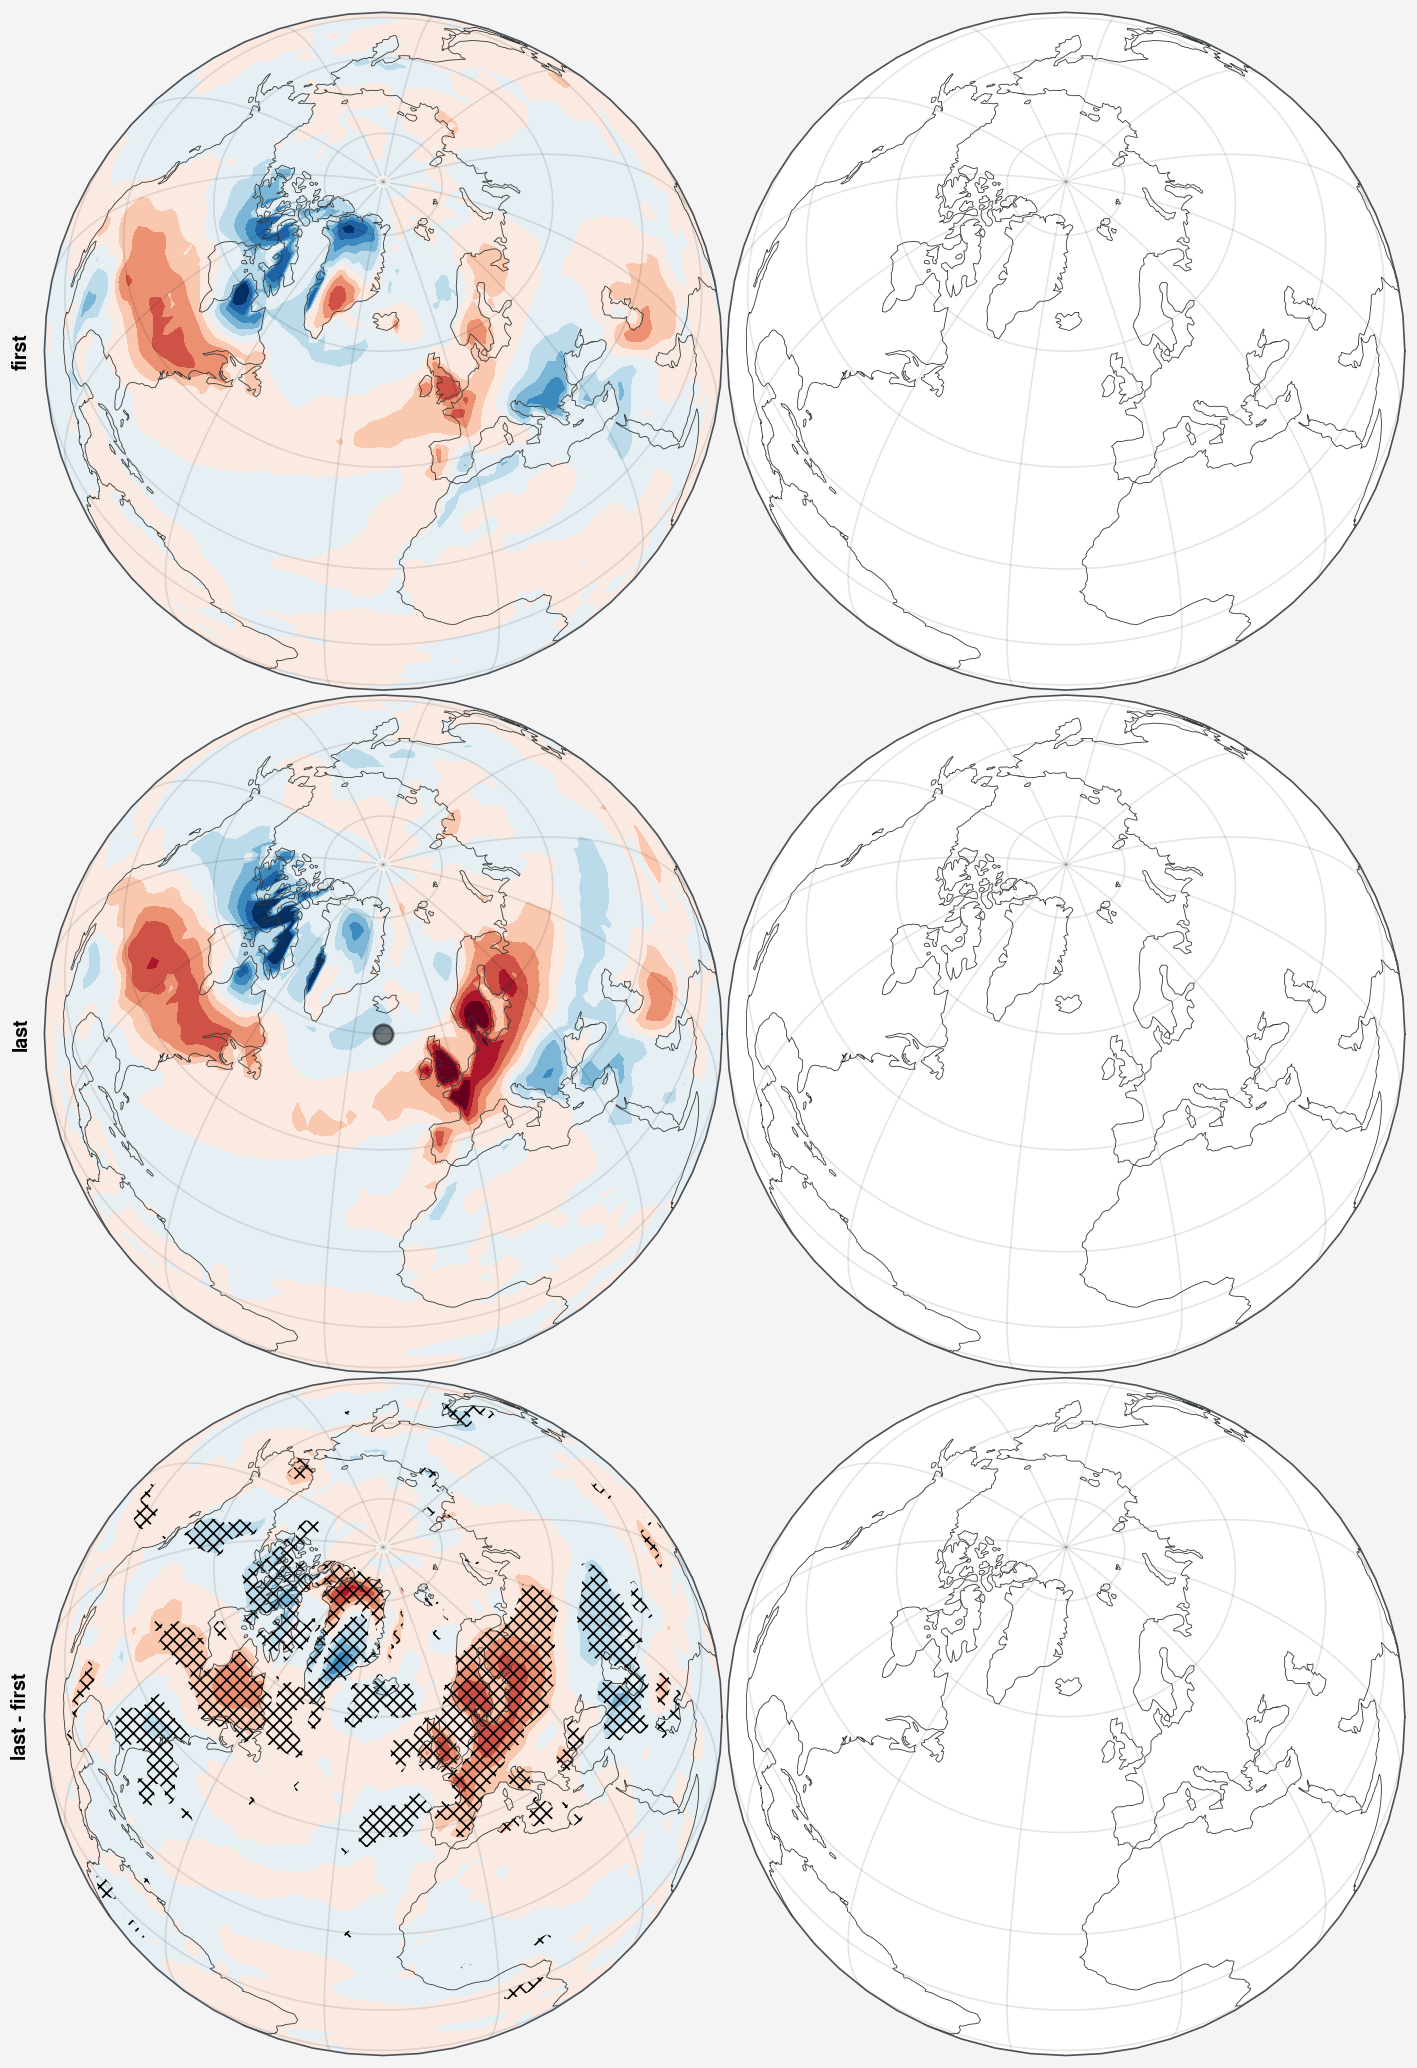

In [3]:
models = ["MPI_GE", "CanESM2", "CESM1_CAM5", "MK36", "GFDL_CM3", "20CR"]
models_legend = [
    "MPI-GE (100)",
    "CanESM2 (50)",
    "CESM1-CAM5 (40)",
    "MK3.6 (30)",
    "GFDL-CM3 (20)",
    "20CR(80)",
]

fig3, axes = pplt.subplots(
    space=0,
    width=180 / 25.4,
    wspace=0.2,
    hspace=0.2,
    proj="ortho",
    proj_kw=({"lon_0": -20, "lat_0": 60}),
    nrows=3,
    ncols=2,
)
axes.format(
    latlines=20,
    lonlines=30,
    color="grey7",
    coast=True,
    coastlinewidth=0.3,
    coastcolor="charcoal",
    leftlabels=["first", "last", "last - first"],
    toplabels_kw={"fontsize": 7},
    leftlabels_kw={"fontsize": 7},
)

comps = {"MPI_GE": ex.tsurf}
axes, maps = composite_plot.plot_composite_single_ext(
    comps, models=["MPI_GE"], axes=axes
)

# Define the lat/lon of the four nodes
lon1, lat1 = -14.5, 54  # upper left corner
lon2, lat2 = 1.5, 44  # upper right corner
lon3, lat3 = 46, 66  # lower right corner
lon4, lat4 = 26, 71  # lower left corner



fig3.show()
selector2 = PolygonSelector(axes[1,0], lambda *args: None)

print("Click on the figure to create a polygon.")
print("Press the 'esc' key to start a new polygon.")
print("Try holding the 'shift' key to move all of the vertices.")
print("Try holding the 'ctrl' key to move a single vertex.")

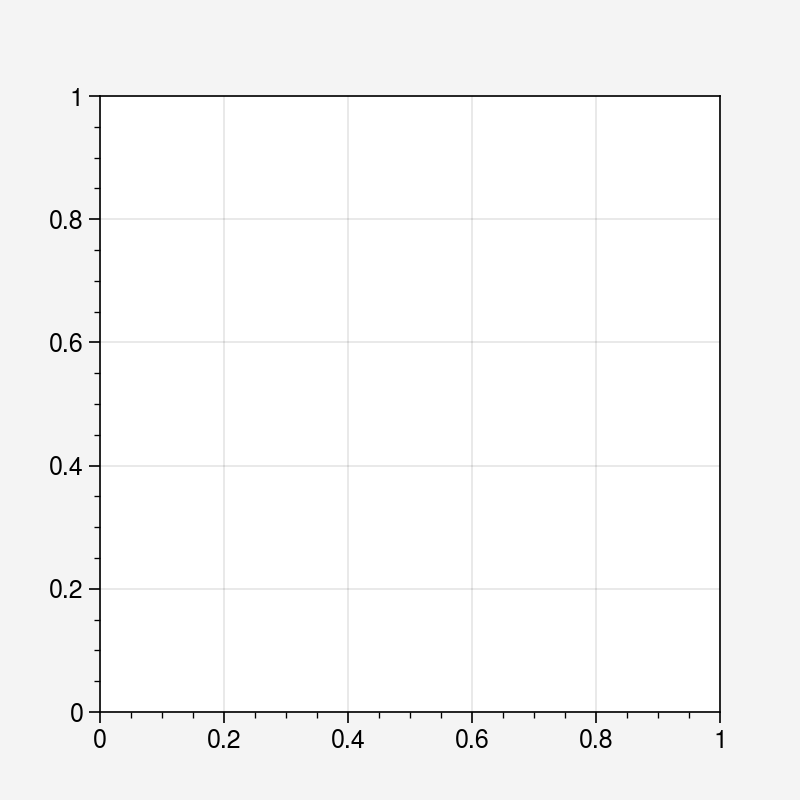

In [4]:
def draw():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()    # interactive mode is on
    plt.show()

    def onselect(data_input):
        print(data_input)

    PS = PolygonSelector(ax, onselect)
    a = input()    # prevent window from closing when execution is done
draw()